<a href="https://colab.research.google.com/github/SlickMik/ensf692Project/blob/main/ENSF_692_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%autosave 2

Autosaving every 2 seconds


# ESNF 692 Project
### Group # : 4
##### Authors : Danish Shahid () | Muhammad Ibrahim Khan ()
---

This notebook describes the correlation of asset classes - Oil, Gold, and S&P500 for a user selected time range

---

Importing Libraries

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib as mp

# Dataset Selection

Downloading Kaggle Datasets

In [ ]:
# Download latest dataset versions
gold_dataset_path = kagglehub.dataset_download("faisaljanjua0555/daily-gold-price-historical-dataset")

oil_dataset_path = kagglehub.dataset_download("tarique7/daily-crude-price-dataset")

sp_dataset_path = kagglehub.dataset_download("youcanttouchthis/s-p-500-dataset")

# Dataset Creation

Reading Dataset to Pandas<br/>
Dropping unnecessary columns<br/>
Setting index to Date<br/>
Parsing Date

In [ ]:
# read csv files into pandas
gold_dataset = pd.read_csv(gold_dataset_path + f'/gold.csv', index_col='Date', parse_dates=True)

oil_dataset = pd.read_csv(oil_dataset_path + f'/Crude Oil WTI Futures Historical Data.csv', index_col='Date', parse_dates=True)

sp_dataset = pd.read_csv(sp_dataset_path + f'/spy.csv', index_col='Date', parse_dates=True)

Gold Dataset
* Dropping Columns
* Renaming Columns

Describing Gold Dataset

In [ ]:
gold_dataset = gold_dataset.drop(columns='Currency').rename(columns = {c : f'Gold_{c}' for c in gold_dataset.columns})
gold_dataset.head(5)

,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Volume
Date,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621
2000-01-05,283.7,285.0,281.0,282.1,25448
2000-01-06,281.6,282.8,280.2,282.4,19055
2000-01-07,282.5,284.5,282.0,282.9,11266
2000-01-10,282.4,283.9,281.8,282.7,30603
2000-01-11,282.4,285.3,281.9,284.4,13500
2000-01-12,284.5,285.0,282.5,283.7,17841
2000-01-13,283.5,285.9,282.9,285.1,12171
2000-01-14,285.2,285.6,284.0,284.9,32339


Oil Dataset
* Dropping Columns
* Reorganizing Columns
* Renaming Columns
* Cleaning Columns

Describing Oil Dataset

In [ ]:
oil_dataset = oil_dataset.drop(columns='Change %').rename(columns={'Vol.': 'Volume', 'Price' : 'Close'})
oil_dataset['Volume'] = oil_dataset['Volume'].str.replace('K', '').astype(float).multiply(1000).fillna(0).astype(int)
oil_dataset = (
    oil_dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
    .rename(columns={c : f'Oil_{c}' for c in oil_dataset.columns})
)
oil_dataset.head(5)

,Oil_Open,Oil_High,Oil_Low,Oil_Close,Oil_Volume
Date,,,,,
2006-12-13,60.97,61.85,60.74,61.37,215430
2006-12-12,61.30,62.01,60.65,61.02,210420
2006-12-11,62.21,62.25,61.05,61.22,197110
2006-12-08,62.75,63.65,61.95,62.03,217500
2006-12-07,62.31,62.76,61.55,62.49,255420
2006-12-06,62.42,63.01,61.84,62.19,221140
2006-12-05,62.42,63.25,61.53,62.43,227430
2006-12-04,63.81,63.82,61.90,62.44,162010
2006-12-01,62.85,63.70,62.24,63.43,176600


S&P 500 Dataset
* Dropping Columns
* Renaming Columns

Describing S&P 500 Dataset

In [ ]:
sp_dataset = sp_dataset.drop(columns='Adj Close').rename(columns = {c : f'S&P500_{c}' for c in sp_dataset.columns})
sp_dataset.head(5)

,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Close,S&P500_Volume
Date,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,492100
1993-02-08,44.96875,45.12500,44.90625,44.96875,596100
1993-02-09,44.81250,44.81250,44.56250,44.65625,122100
1993-02-10,44.65625,44.75000,44.53125,44.71875,379600


Join Datasets

In [ ]:
assets_df = sp_dataset.join(gold_dataset, how='outer').join(oil_dataset, how='outer')

Describing Joined Dataset

In [ ]:
assets_df.head(5)

,S&P500_Open,S&P500_High,S&P500_Low,S&P500_Close,S&P500_Volume,Gold_Open,Gold_High,Gold_Low,Gold_Close,Gold_Volume,Oil_Open,Oil_High,Oil_Low,Oil_Close,Oil_Volume
Date,,,,,,,,,,,,,,,
1987-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.41,18.60,18.36,18.57,14600.0
1987-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.47,18.78,18.42,18.77,14080.0
1987-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.04,19.20,18.90,19.01,11490.0
1987-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.83,18.95,18.71,18.89,8740.0
1987-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.97,19.15,18.82,19.13,12180.0


Drop Duplicated Columns If Any

In [ ]:
if assets_df.columns.duplicated():
  assets_df = assets_df.T.drop_duplicates().T

Set Hierarchical Index on Rows

In [ ]:
assets_df = assets_df.set_index(
    pd.MultiIndex.from_arrays(
        [assets_df.index.year,assets_df.index.month, assets_df.index.day], names=['Year', 'Month', 'Day']
        )
    )

Describing Joined Dataset after Hierarchical Indexing on Rows

In [ ]:
assets_df.head(5)

S&P500_Open  S&P500_High  S&P500_Low  S&P500_Close  \
Year Month Day                                                       
1987 1     8            NaN          NaN         NaN           NaN   
           9            NaN          NaN         NaN           NaN   
           12           NaN          NaN         NaN           NaN   
           13           NaN          NaN         NaN           NaN   
           14           NaN          NaN         NaN           NaN   

                S&P500_Volume  Gold_Open  Gold_High  Gold_Low  Gold_Close  \
Year Month Day                                                              
1987 1     8              NaN        NaN        NaN       NaN         NaN   
           9              NaN        NaN        NaN       NaN         NaN   
           12             NaN        NaN        NaN       NaN         NaN   
           13             NaN        NaN        NaN       NaN         NaN   
           14             NaN        NaN        NaN       NaN         NaN   

                Gold_Volume  Oil_Open  Oil_High  Oil_Low  Oil_Close  \
Year Month Day                                                        
1987 1     8            NaN     18.41     18.60    18.36      18.57   
           9            NaN     18.47     18.78    18.42      18.77   
           12           NaN     19.04     19.20    18.90      19.01   
           13           NaN     18.83     18.95    18.71      18.89   
           14           NaN     18.97     19.15    18.82      19.13   

                Oil_Volume  
Year Month Day              
1987 1     8       14600.0  
           9       14080.0  
           12      11490.0  
           13       8740.0  
           14      12180.0

# User Entry

In [128]:
start_date = pd.to_datetime(input('Enter the start date  (e.g YYYY-MM-DD)'))
end_date = pd.to_datetime(input('Enter the end date  (e.g YYYY-MM-DD)'))
range_df = assets_df.loc[pd.IndexSlice[start_date.year:end_date.year, start_date.month : end_date.month, start_date.day : end_date.day], :]

range_df.head(2)

Enter the start date  (e.g YYYY-MM-DD)2002-01-01
Enter the end date  (e.g YYYY-MM-DD)2004-12-30


S&P500_Open  S&P500_High  S&P500_Low  S&P500_Close  \
Year Month Day                                                       
2002 1     2     115.110001   115.750000  113.809998    115.529999   
           3     115.650002   116.949997  115.540001    116.839996   

                S&P500_Volume  Gold_Open  Gold_High  Gold_Low  Gold_Close  \
Year Month Day                                                              
2002 1     2       18651900.0      279.5      279.8     278.2       279.2   
           3       15743000.0      279.0      280.4     277.2       278.5   

                Gold_Volume  Oil_Open  Oil_High  Oil_Low  Oil_Close  \
Year Month Day                                                        
2002 1     2        18026.0     19.90     21.05    19.72      21.01   
           3        14008.0     21.04     21.23    19.72      20.37   

                Oil_Volume  
Year Month Day              
2002 1     2       69560.0  
           3       64010.0

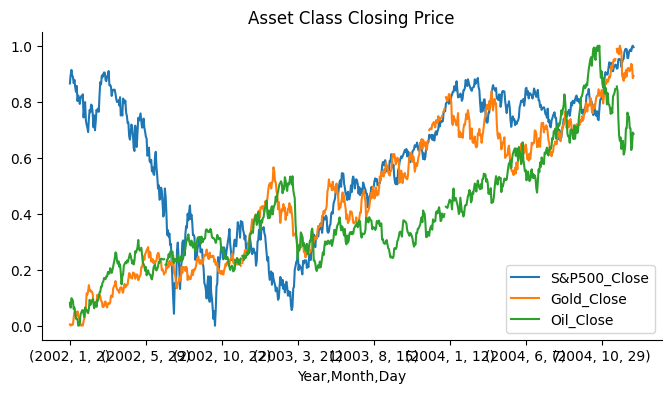

In [129]:
from matplotlib import pyplot as plt
sliced_df = range_df[['S&P500_Close', 'Gold_Close', 'Oil_Close']]
((sliced_df - sliced_df.min()) / (sliced_df.max() - sliced_df.min())).plot(kind='line', figsize=(8, 4), title='Asset Class Closing Price')
plt.gca().spines[['top', 'right']].set_visible(False)

# Analysis & Calculations

In [ ]:
# Analysis and Calculations

# Export & Matplotlib